In [7]:
from matplotlib import pyplot as plt    
from matplotlib import style
import seaborn as sns
style.use('ggplot')
import numpy as np
import pandas as pd


In [8]:
#import data
df = pd.read_csv('A.txt',header=None, delimiter=' ')
df.columns = ['x', 'y']

In [9]:
#change dataframe to numpy arrary
df = df.values

In [10]:
class K_Means:
    def __init__(self, k=2, max_iter=40):
        self.k=k
        self.max_iter=max_iter
    
    def fit(self,data):
        self.centroids = {}
        #randomly pick data as centroid at beginning
        np.random.shuffle(data)
        for i in range(self.k):
            self.centroids[i] = data[i]
        self.SSError=[]
        for i in range(self.max_iter):
            self.classifications = {}

            #run everytime we need to clear the classification dict
            for i in range(self.k):
                self.classifications[i] = []
            dist_square=0
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                dist_square +=min(distances)**2
            self.SSError.append(dist_square)
            
            prev_centroids = dict(self.centroids)
            #update centroid
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

    
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification



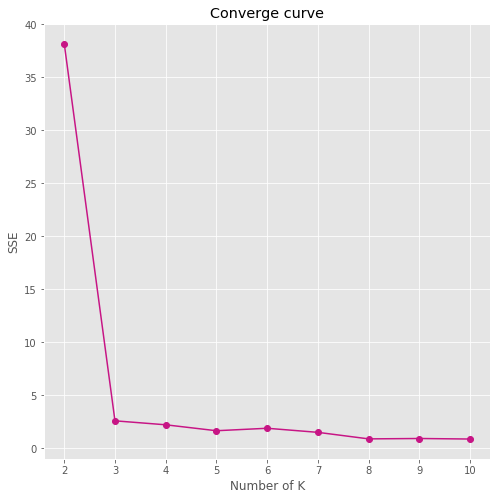

In [11]:
k1= np.arange(2, 11)
SSE=[]
for k in range(2,11):
    clf1 = K_Means(k=k)
    clf1.fit(df)
    SSE.append(min(clf1.SSError))
SSE=np.array(SSE)

plt.figure(figsize=(8,8))
plt.plot(k1, SSE, marker='o', color='mediumvioletred')
plt.xlabel('Number of K')
plt.ylabel('SSE')
plt.title('Converge curve')
plt.show()


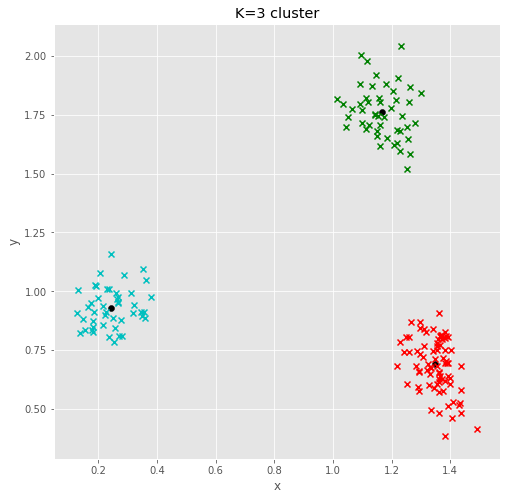

In [12]:
colors = 10*["g","r","c","b","k"]
clf2=K_Means(k=3)
clf2.fit(df)

plt.figure(figsize=(8,8))
for centroid in clf2.centroids:
    plt.scatter(clf2.centroids[centroid][0],clf2.centroids[centroid][1], marker="o",  color="k")
for classification in clf2.classifications:
    color = colors[classification]
    for featureset in clf2.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, linewidths=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('K=3 cluster')

plt.show()